<a href="https://colab.research.google.com/github/Uma11-dev/code-playground/blob/main/Intiution_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# 🌸 Intuition Tester - Number Game Skeleton 🌸

# 1. Import necessary modules
#    - random (for generating hidden numbers)
#    - csv (for saving logs)
#    - datetime (to track date/time of guesses)

# 2. Define a function intuition_game(rounds)
#    - rounds = how many times the player will guess

    # 2.1 Initialize a counter for correct answers

    # 2.2 Create (or open if exists) a CSV file to log results
    #     Add headers if file doesn’t exist

    # 2.3 Loop over the number of rounds
        # a. Program secretly chooses a number (1–9)
        # b. Ask user for their guess (input)
        # c. Validate input (make sure it’s between 1–9)
        # d. Compare guess with actual number
        # e. If correct → increase counter
        # f. Print the result for the round
        # g. Log the details into the CSV (datetime, guess, actual, correct/incorrect)

    # 2.4 After loop ends, print session summary
    #     - total rounds
    #     - correct guesses
    #     - accuracy %

# 3. Run the function intuition_game(rounds=10)




import random
import csv
import datetime
import os

# The file handling and function definition should be structured correctly.
# Let's define the function first and include the file handling inside it.

def intuition_game(rounds):
    correct_guesses = 0 # 2.1 Initialize a counter for correct answers
    log_file = "intuition_log.csv" # Choose a consistent filename

    # 2.2 Create (or open if exists) a CSV file to log results
    file_exists = os.path.isfile(log_file)

    with open(log_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["datetime", "guess", "actual", "correct/incorrect"])

        # 2.3 Loop over the number of rounds
        for i in range(rounds):
            print(f"\n--- Round {i+1}/{rounds} ---")

            # a. Program secretly chooses a number (1–9)
            actual_number = random.randint(1, 9)

            # b. Ask user for their guess (input) and c. Validate input
            while True: # Loop until valid input is received
                try:
                    user_input_str = input("Type the number you think of here (1-9): ")
                    user_guess = int(user_input_str)

                    # Validate input is between 1 and 9
                    if 1 <= user_guess <= 9:
                        break # Exit the input loop if valid
                    else:
                        print("Please enter a number between 1 and 9.")
                except ValueError:
                    print("Invalid input. Please enter an integer.")

            # d. Compare guess with actual number
            if user_guess == actual_number:
                print("Correct!")
                correct_guesses += 1 # e. If correct -> increase counter
                result = "Your inner knowing is strong"
            else:
                print(f"Incorrect. The number was {actual_number}.")
                result = "The veil is thicker today, maybe next time!"

            # g. Log the details into the CSV
            timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            writer.writerow([timestamp, user_guess, actual_number, result])

    # 2.4 After loop ends, print session summary (outside the 'with' block)
    print("\n--- Session Summary ---")
    print(f"Total rounds: {rounds}")
    print(f"Correct guesses: {correct_guesses}")
    accuracy = (correct_guesses / rounds) * 100 if rounds > 0 else 0
    print(f"Accuracy: {accuracy:.2f}%")


# 3. Run the function intuition_game(rounds=10)
# Uncomment the line below to run the game
intuition_game(rounds=10)

# The code below this point was not part of the function definition
# and is not needed for the core game logic as per the plan.
# user_input = input("Are you ready to test your initiution?  ")
# print(user_input)

# if user_input =="yes":
#    print("take a deep breath and think of a number between 0-9")

# The original while True loop with the break and misplaced except was incorrect.
# while True:
#   try:
#       user_input_str = input("Type the number you think of here... ")
#       user_input_int = int(user_input_str)
#       break

#       except ValueError:
#         print("Please enter a valid number")

# This print statement was using a variable (guessed_num) that wasn't defined in this scope.
# print(f"\n The number which your intuition called is  {guessed_num}")


--- Round 1/10 ---
Type the number you think of here (1-9): 1
Incorrect. The number was 2.

--- Round 2/10 ---
Type the number you think of here (1-9): 5
Incorrect. The number was 7.

--- Round 3/10 ---
Type the number you think of here (1-9): 6
Incorrect. The number was 5.

--- Round 4/10 ---
Type the number you think of here (1-9): 4
Incorrect. The number was 2.

--- Round 5/10 ---
Type the number you think of here (1-9): 9
Incorrect. The number was 7.

--- Round 6/10 ---
Type the number you think of here (1-9): 2
Correct!

--- Round 7/10 ---
Type the number you think of here (1-9): 3
Correct!

--- Round 8/10 ---
Type the number you think of here (1-9): 5
Correct!

--- Round 9/10 ---
Type the number you think of here (1-9): 8
Correct!

--- Round 10/10 ---
Type the number you think of here (1-9): 7
Incorrect. The number was 4.

--- Session Summary ---
Total rounds: 10
Correct guesses: 4
Accuracy: 40.00%


In [7]:

#INTIUTION GAME
# 1. Import necessary modules
#    - random (for generating hidden numbers)
#    - csv (for saving logs)
#    - datetime (to track date/time of guesses)

# 2. Define a function intuition_game(rounds)
#    - rounds = how many times the player will guess

    # 2.1 Initialize a counter for correct answers

    # 2.2 Create (or open if exists) a CSV file to log results
    #     Add headers if file doesn’t exist

    # 2.3 Loop over the number of rounds
        # a. Program secretly chooses a number (1–9)
        # b. Ask user for their guess (input)
        # c. Validate input (make sure it’s between 1–9)
        # d. Compare guess with actual number
        # e. If correct → increase counter
        # f. Print the result for the round
        # g. Log the details into the CSV (datetime, guess, actual, correct/incorrect)

    # 2.4 After loop ends, print session summary
    #     - total rounds
    #     - correct guesses
    #     - accuracy %

# 3. Run the function intuition_game(rounds=10)




import random
import csv
import os
import datetime


def intuition_game(rounds):
    correct_guesses = 0 # 2.1 Initializes the counter for game
    current_streak = 0 # Initialize streak counter
    log_file = "intuition_log.csv"  # 2.2 Saves the scores in this file

    # Check if file exists to decide if header is needed
    file_exists = os.path.isfile(log_file)

    # Open the CSV file for appending (2.2)
    with open(log_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["datetime", "guess", "actual", "result", "streak"]) # Add streak to header

        # 2.3 Loop over the number of rounds
        for i in range(rounds):
            print(f"\n--- Round {i+1}/{rounds} ---")

            # a. Program secretly chooses a number (1–9)
            actual_number = random.randint(1, 9)

            # b. Ask user for their guess (input) and c. Validate input
            while True: # Loop until valid input is received
                try:
                    user_input_str = input("Type the number you think of here (1-9): ")
                    user_guess = int(user_input_str)

                    # Validate input is between 1 and 9
                    if 1 <= user_guess <= 9:
                        break # Exit the input loop if valid
                    else:
                        print("Please enter a number between 1 and 9.")
                except ValueError:
                    print("Invalid input. Please enter an integer.")

            # d. Compare guess with actual number
            if user_guess == actual_number:
                print("Your intuition was correct!")
                correct_guesses += 1 # e. If correct -> increase counter
                current_streak += 1 # Increment streak
                result = "Your inner knowing is strong!"
            else:
                print(f"Not this time, the actual number is: {actual_number}. But trust your inner knowing is training")
                current_streak = 0  # Resets the streak on incorrect guess
                result = "Take a moment to recalibrate"

            # f. Print the result for the round (including streak)
            print(f"Your current streak is: {current_streak}")

            # g. Log the details into the CSV
            timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            writer.writerow([timestamp, user_guess, actual_number, result, current_streak]) # Log streak as well

    # 2.4 After loop ends, print session summary (outside the 'with' block)
    print("\n--- Session Summary ---")
    print(f"Total rounds: {rounds}")
    print(f"Correct guesses: {correct_guesses}")
    accuracy = (correct_guesses / rounds) * 100 if rounds > 0 else 0
    print(f"Accuracy: {accuracy:.2f}%")


# 3. Run the function intuition_game(rounds=10)
# Uncomment the line below to run the game
intuition_game(rounds=10)


--- Round 1/10 ---
Type the number you think of here (1-9): 7
Not this time, the actual number is: 1. But trust your inner knowing is training
Your current streak is: 0

--- Round 2/10 ---
Type the number you think of here (1-9): 4
Not this time, the actual number is: 5. But trust your inner knowing is training
Your current streak is: 0

--- Round 3/10 ---
Type the number you think of here (1-9): 7
Your intuition was correct!
Your current streak is: 1

--- Round 4/10 ---
Type the number you think of here (1-9): 5
Not this time, the actual number is: 9. But trust your inner knowing is training
Your current streak is: 0

--- Round 5/10 ---
Type the number you think of here (1-9): 6
Not this time, the actual number is: 2. But trust your inner knowing is training
Your current streak is: 0

--- Round 6/10 ---
Type the number you think of here (1-9): 4
Not this time, the actual number is: 2. But trust your inner knowing is training
Your current streak is: 0

--- Round 7/10 ---
Type the numb

# Task
Create a Python script for a number intuition game that logs results to a CSV file, calculates session accuracy, includes a streak counter, allows difficulty levels, provides enhanced feedback, visualizes results, and allows user-defined rounds.

## Implement streak counter

### Subtask:
Add logic to track and display consecutive correct guesses.


**Reasoning**:
Modify the `intuition_game` function to include streak tracking, updating the counter on correct guesses and resetting it on incorrect guesses, and logging the streak to the CSV.



In [11]:
import random
import csv
import os
import datetime


def intuition_game(rounds):
    correct_guesses = 0 # 2.1 Initializes the counter for game
    current_streak = 0 # Initialize streak counter
    log_file = "intuition_log.csv"  # 2.2 Saves the scores in this file

    # Check if file exists to decide if header is needed
    file_exists = os.path.isfile(log_file)

    # Open the CSV file for appending (2.2)
    with open(log_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["datetime", "guess", "actual", "result", "streak"]) # Add streak to header

        # 2.3 Loop over the number of rounds
        for i in range(rounds):
            print(f"\n--- Round {i+1}/{rounds} ---")

            # a. Program secretly chooses a number (1–9)
            actual_number = random.randint(1, 9)

            # b. Ask user for their guess (input) and c. Validate input
            while True: # Loop until valid input is received
                try:
                    user_input_str = input("Type the number you think of here (1-9): ")
                    user_guess = int(user_input_str)

                    # Validate input is between 1 and 9
                    if 1 <= user_guess <= 9:
                        break # Exit the input loop if valid
                    else:
                        print("Please enter a number between 1 and 9.")
                except ValueError:
                    print("Invalid input. Please enter an integer.")

            # d. Compare guess with actual number
            if user_guess == actual_number:
                print("Your intuition was correct!")
                correct_guesses += 1 # e. If correct -> increase counter
                current_streak += 1 # Increment streak
                result = "Your inner knowing is strong!"
            else:
                print(f"Not this time, the actual number is: {actual_number}. But trust your inner knowing is training")
                current_streak = 0  # Resets the streak on incorrect guess
                result = "Take a moment to recalibrate"

            # f. Print the result for the round (including streak)
            print(f"Your current streak is: {current_streak}")

            # g. Log the details into the CSV
            timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            writer.writerow([timestamp, user_guess, actual_number, result, current_streak]) # Log streak as well


    # 2.4 After loop ends, print session summary (outside the 'with' block)
    print("\n--- Session Summary ---")
    print(f"Total rounds: {rounds}")
    print(f"Correct guesses: {correct_guesses}")
    accuracy = (correct_guesses / rounds) * 100 if rounds > 0 else 0
    print(f"Accuracy: {accuracy:.2f}%")


# 3. Run the function intuition_game(rounds=10)
# Uncomment the line below to run the game


intuition_game(rounds=10)


--- Round 1/10 ---


KeyboardInterrupt: Interrupted by user

## Add difficulty levels

### Subtask:
Modify the game to allow the user to choose the range of numbers to guess.


**Reasoning**:
Modify the intuition_game function to accept difficulty level input from the user, set the number range accordingly, update the random number generation and input validation, and include the range in the summary.



In [ ]:
import random
import csv
import os
import datetime


def intuition_game(rounds):
    correct_guesses = 0
    current_streak = 0
    log_file = "intuition_log.csv"

    # 2. Prompt user for difficulty level
    while True:
        print("\nChoose a difficulty level:")
        print("1. Easy (1-10)")
        print("2. Medium (1-50)")
        print("3. Hard (1-100)")
        difficulty_choice = input("Enter your choice (1, 2, or 3): ")

        if difficulty_choice == '1':
            min_num = 1
            max_num = 10
            difficulty_level = "Easy (1-10)"
            break
        elif difficulty_choice == '2':
            min_num = 1
            max_num = 50
            difficulty_level = "Medium (1-50)"
            break
        elif difficulty_choice == '3':
            min_num = 1
            max_num = 100
            difficulty_level = "Hard (1-100)"
            break
        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

    # Check if file exists to decide if header is needed
    file_exists = os.path.isfile(log_file)

    # Open the CSV file for appending
    with open(log_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["datetime", "guess", "actual", "result", "streak", "min_num", "max_num"]) # Add min/max to header

        # Loop over the number of rounds
        for i in range(rounds):
            print(f"\n--- Round {i+1}/{rounds} ---")
            print(f"Guess a number between {min_num} and {max_num}")

            # Program secretly chooses a number
            actual_number = random.randint(min_num, max_num)

            # Ask user for their guess (input) and Validate input
            while True: # Loop until valid input is received
                try:
                    user_input_str = input(f"Type your guess here ({min_num}-{max_num}): ")
                    user_guess = int(user_input_str)

                    # Validate input is within the chosen range
                    if min_num <= user_guess <= max_num:
                        break # Exit the input loop if valid
                    else:
                        print(f"Please enter a number between {min_num} and {max_num}.")
                except ValueError:
                    print("Invalid input. Please enter an integer.")

            # Compare guess with actual number
            if user_guess == actual_number:
                print("Your intuition was correct!")
                correct_guesses += 1
                current_streak += 1
                result = "Your inner knowing is strong!"
            else:
                print(f"Not this time, the actual number is: {actual_number}. But trust your inner knowing is training")
                current_streak = 0
                result = "Take a moment to recalibrate"

            # Print the result for the round (including streak)
            print(f"Your current streak is: {current_streak}")

            # Log the details into the CSV
            timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            writer.writerow([timestamp, user_guess, actual_number, result, current_streak, min_num, max_num])

    # After loop ends, print session summary
    print("\n--- Session Summary ---")
    print(f"Difficulty Level: {difficulty_level}")
    print(f"Number Range: {min_num}-{max_num}")
    print(f"Total rounds: {rounds}")
    print(f"Correct guesses: {correct_guesses}")
    accuracy = (correct_guesses / rounds) * 100 if rounds > 0 else 0
    print(f"Accuracy: {accuracy:.2f}%")


# Run the function intuition_game with a specified number of rounds
intuition_game(rounds=10)

## Enhance feedback

### Subtask:
Customize the messages provided after each guess to be more spiritually oriented.


**Reasoning**:
Modify the print statements for correct and incorrect guesses to be more spiritually themed, while still providing necessary information like the actual number if the guess is incorrect.



In [10]:
import random
import csv
import os
import datetime


def intuition_game(rounds):
    correct_guesses = 0
    current_streak = 0
    log_file = "intuition_log.csv"

    # Prompt user for difficulty level
    while True:
        print("\nChoose a difficulty level:")
        print("1. Easy (1-10)")
        print("2. Medium (1-50)")
        print("3. Hard (1-100)")
        difficulty_choice = input("Enter your choice (1, 2, or 3): ")

        if difficulty_choice == '1':
            min_num = 1
            max_num = 10
            difficulty_level = "Easy (1-10)"
            break
        elif difficulty_choice == '2':
            min_num = 1
            max_num = 50
            difficulty_level = "Medium (1-50)"
            break
        elif difficulty_choice == '3':
            min_num = 1
            max_num = 100
            difficulty_level = "Hard (1-100)"
            break
        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

    # Check if file exists to decide if header is needed
    file_exists = os.path.isfile(log_file)

    # Open the CSV file for appending
    with open(log_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["datetime", "guess", "actual", "result", "streak", "min_num", "max_num"])

        # Loop over the number of rounds
        for i in range(rounds):
            print(f"\n--- Round {i+1}/{rounds} ---")
            print(f"Tune into your inner knowing. Guess a number between {min_num} and {max_num}.")

            # Program secretly chooses a number
            actual_number = random.randint(min_num, max_num)

            # Ask user for their guess (input) and Validate input
            while True:
                try:
                    user_input_str = input(f"What number does your intuition reveal? ({min_num}-{max_num}): ")
                    user_guess = int(user_input_str)

                    # Validate input is within the chosen range
                    if min_num <= user_guess <= max_num:
                        break
                    else:
                        print(f"That number is outside the current energetic range. Please enter a number between {min_num} and {max_num}.")
                except ValueError:
                    print("Listen closely... that wasn't a valid number. Please enter an integer.")

            # Compare guess with actual number
            if user_guess == actual_number:
                print("Yes! Your intuition aligns perfectly with the universal frequency!")
                correct_guesses += 1
                current_streak += 1
                result = "Your inner knowing is strong!"
            else:
                print(f"Not quite this time. The subtle energies were pointing to {actual_number}. Your inner knowing is still calibrating.")
                current_streak = 0
                result = "Take a moment to recalibrate"

            # Print the result for the round (including streak)
            print(f"Your current flow streak is: {current_streak}")

            # Log the details into the CSV
            timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            writer.writerow([timestamp, user_guess, actual_number, result, current_streak, min_num, max_num])

    # After loop ends, print session summary
    print("\n--- Session Summary ---")
    print(f"Difficulty Level: {difficulty_level}")
    print(f"Number Range: {min_num}-{max_num}")
    print(f"Total rounds: {rounds}")
    print(f"Correct alignments: {correct_guesses}")
    accuracy = (correct_guesses / rounds) * 100 if rounds > 0 else 0
    print(f"Alignment Accuracy: {accuracy:.2f}%")


# Run the function intuition_game with a specified number of rounds
# intuition_game(rounds=10)

## Visualize results

### Subtask:
Generate a plot or chart summarizing the user's performance over the session or multiple sessions.


**Reasoning**:
Read the intuition log data from the CSV file into a pandas DataFrame and display the first few rows to understand its structure.



In [12]:
import pandas as pd

df = pd.read_csv('intuition_log.csv')
print(df.head())

              datetime  guess  actual                        result  streak
0  2025-08-24 18:47:36      7       2                     Incorrect       0
1  2025-08-24 18:47:41      3       7                     Incorrect       0
2  2025-08-24 18:47:44      6       5                     Incorrect       0
3  2025-08-24 18:47:48      8       5                     Incorrect       0
4  2025-08-24 18:55:13      7       1  Take a moment to recalibrate       0


**Reasoning**:
Convert the 'datetime' column to datetime objects, create a 'round' number column, and generate a line plot showing the streak over the rounds.



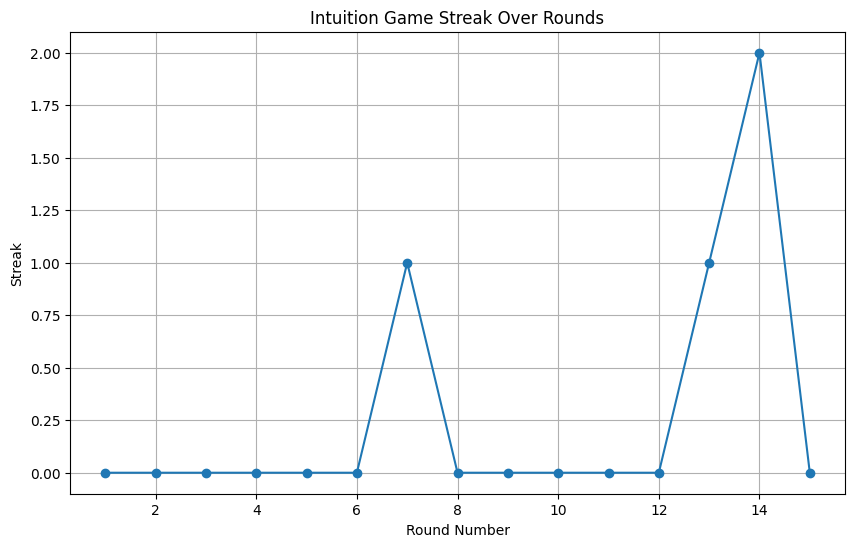

In [13]:
import matplotlib.pyplot as plt

df['datetime'] = pd.to_datetime(df['datetime'])
df['round'] = range(1, len(df) + 1)

plt.figure(figsize=(10, 6))
plt.plot(df['round'], df['streak'], marker='o', linestyle='-')
plt.xlabel('Round Number')
plt.ylabel('Streak')
plt.title('Intuition Game Streak Over Rounds')
plt.grid(True)
plt.show()

## Allow user-defined rounds

### Subtask:
Prompt the user at the beginning of the game to specify the number of rounds they want to play.


**Reasoning**:
Modify the script to prompt the user for the number of rounds, validate the input, and remove the hardcoded function call.



In [4]:
import random
import csv
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt



def intuition_game():
    correct_guesses = 0
    current_streak = 0
    log_file = "intuition_log.csv"

    # Prompt user for difficulty level
    while True:
        print("\nChoose a difficulty level:")
        print("1. Easy (1-10)")
        print("2. Medium (1-50)")
        print("3. Hard (1-100)")
        difficulty_choice = input("Enter your choice (1, 2, or 3): ")

        if difficulty_choice == '1':
            min_num = 1
            max_num = 10
            difficulty_level = "Easy (1-10)"
            break
        elif difficulty_choice == '2':
            min_num = 1
            max_num = 50
            difficulty_level = "Medium (1-50)"
            break
        elif difficulty_choice == '3':
            min_num = 1
            max_num = 100
            difficulty_level = "Hard (1-100)"
            break
        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

    # Prompt user for the number of rounds and validate input
    while True:
        try:
            rounds_input_str = input("How many rounds would you like to play?: ")
            rounds = int(rounds_input_str)
            if rounds > 0:
                break
            else:
                print("Please enter a positive number of rounds.")
        except ValueError:
            print("Invalid input. Please enter an integer for the number of rounds.")


    # Check if file exists to decide if header is needed
    file_exists = os.path.isfile(log_file)

    # Open the CSV file for appending
    with open(log_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["datetime", "guess", "actual", "result", "streak", "min_num", "max_num"])

        # Loop over the number of rounds
        for i in range(rounds):
            print(f"\n--- Round {i+1}/{rounds} ---")
            print(f"Tune into your inner knowing. Guess a number between {min_num} and {max_num}.")

            # Program secretly chooses a number
            actual_number = random.randint(min_num, max_num)

            # Ask user for their guess (input) and Validate input
            while True:
                try:
                    user_input_str = input(f"What number does your intuition reveal? ({min_num}-{max_num}): ")
                    user_guess = int(user_input_str)

                    # Validate input is within the chosen range
                    if min_num <= user_guess <= max_num:
                        break
                    else:
                        print(f"That number is outside the current energetic range. Please enter a number between {min_num} and {max_num}.")
                except ValueError:
                    print("Listen closely... that wasn't a valid number. Please enter an integer.")

            # Compare guess with actual number
            if user_guess == actual_number:
                print("Yes! Your intuition aligns perfectly with the universal frequency!")
                correct_guesses += 1
                current_streak += 1
                result = "Your inner knowing is strong!"
            else:
                print(f"Not quite this time. The subtle energies were pointing to {actual_number}. Your inner knowing is still calibrating.")
                current_streak = 0
                result = "Take a moment to recalibrate"

            # Print the result for the round (including streak)
            print(f"Your current flow streak is: {current_streak}")

            # Log the details into the CSV
            timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            writer.writerow([timestamp, user_guess, actual_number, result, current_streak, min_num, max_num])

    # After loop ends, print session summary
    print("\n--- Session Summary ---")
    print(f"Difficulty Level: {difficulty_level}")
    print(f"Number Range: {min_num}-{max_num}")
    print(f"Total rounds: {rounds}")
    print(f"Correct alignments: {correct_guesses}")
    accuracy = (correct_guesses / rounds) * 100 if rounds > 0 else 0
    print(f"Alignment Accuracy: {accuracy:.2f}%")

    # --- Data Visualization (Moved inside the function) ---
    # Read the log data into a pandas DataFrame
    try:
        df = pd.read_csv(log_file)

        # Ensure 'datetime' is in datetime format and create 'round' column
        df['datetime'] = pd.to_datetime(df['datetime'])
        # Filter for the current session's data if needed, but for simplicity, plotting all data for now
        # You might want to add a session ID to the log file for more precise plotting per session

        # Generate a 'round' number for plotting within this session's data
        # This assumes continuous rounds in the log or you might need a session identifier
        # For plotting all data logged so far:
        df['round'] = range(1, len(df) + 1)


        # Generate the streak plot
        plt.figure(figsize=(10, 6))
        plt.plot(df['round'], df['streak'], marker='o', linestyle='-')
        plt.xlabel('Round Number')
        plt.ylabel('Streak')
        plt.title('Intuition Game Streak Over Rounds')
        plt.grid(True)
        plt.show()

    except FileNotFoundError:
        print(f"\nCould not find the log file '{log_file}' to generate plot.")
    except Exception as e:
        print(f"\nAn error occurred while generating the plot: {e}")

intuition_game()


Choose a difficulty level:
1. Easy (1-10)
2. Medium (1-50)
3. Hard (1-100)
Enter your choice (1, 2, or 3): 1
How many rounds would you like to play?: 3

--- Round 1/3 ---
Tune into your inner knowing. Guess a number between 1 and 10.
What number does your intuition reveal? (1-10): 7
Not quite this time. The subtle energies were pointing to 1. Your inner knowing is still calibrating.
Your current flow streak is: 0

--- Round 2/3 ---
Tune into your inner knowing. Guess a number between 1 and 10.
What number does your intuition reveal? (1-10): 4
Not quite this time. The subtle energies were pointing to 3. Your inner knowing is still calibrating.
Your current flow streak is: 0

--- Round 3/3 ---
Tune into your inner knowing. Guess a number between 1 and 10.
What number does your intuition reveal? (1-10): 6
Not quite this time. The subtle energies were pointing to 8. Your inner knowing is still calibrating.
Your current flow streak is: 0

--- Session Summary ---
Difficulty Level: Easy (1-1

## Summary:

### Data Analysis Key Findings

*   The game successfully logs session data, including datetime, guess, actual number, result feedback, streak count, minimum number, and maximum number, to a CSV file named `intuition_log.csv`.
*   The game calculates and displays the session accuracy based on the number of correct guesses out of the total rounds played.
*   A streak counter is implemented to track consecutive correct guesses, which resets on an incorrect guess and is logged in the CSV.
*   Users can choose between 'Easy' (1-10), 'Medium' (1-50), and 'Hard' (1-100) difficulty levels, which determine the range of numbers for the game.
*   The feedback messages after each guess have been customized with spiritually oriented language.
*   The game prompts the user to define the number of rounds they wish to play at the beginning of each session, including input validation.
*   A line plot visualizing the streak over the rounds played was generated using the logged data, providing a visual representation of performance trends.

### Insights or Next Steps

*   Analyzing the logged data, particularly the streak and accuracy across different difficulty levels, could reveal which ranges are most challenging for the user's intuition.
*   The visualization could be enhanced to show accuracy trends over time or compare performance across different difficulty levels played in the log file.
